In [12]:
# import modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np

df = pd.read_csv('../../../data/final_parsed_malt_data_cleaned.csv')
df

,name,profile_image,headline,experience,price,response_rate,response_time,categories,skills,supermalter,...,presentation,recommendations,missions,teletravail_preference,profil,link,creation_date,city,Region_Name,timestamp
0,Aurélien D.,https://dam.malt.com/vabndz3c9dkhsimtvgww?grav...,"SysOps, DevOps et développeur web",8-15,550,1.00,1h,"['Administrateur base de données', 'Administra...","['Linux', 'Ansible', 'PHP', 'Apache', 'Proxmox...",0,...,SysOps (unix) depuis 5 ans et DevOps depuis 4 ...,1,12,0,aureliendazy,https://www.malt.fr/profile/aureliendazy,2013-06-06,La Rochelle,bourgogne-franche-comté,2013-06-06
1,Youri Galescot,https://dam.malt.com/r3nb6gaf6723bi1unhhx?grav...,Développeur web frontend et backend,-,235,0.33,12h,[],"['PHP', 'HTML5', 'CSS3', 'SEO', 'jQuery', 'Res...",0,...,"Bonjour,Je suis développeur frontend et backen...",0,0,0,yourigalescot,https://www.malt.fr/profile/yourigalescot,2014-02-18,Paris,île-de-france,2014-02-18
2,Julien Trezeux,https://dam.malt.com/pllhwpaapz84yfqmc7rw?grav...,directeur artistique - graphiste - illustrateur,8-15,350,1.00,1h,"['Photographe', 'Graphiste', 'Illustrateur']","['Direction artistique', 'Graphisme', 'Design ...",0,...,"Graphiste et directeur artistique depuis 2007,...",3,0,0,julientrezeux,https://www.malt.fr/profile/julientrezeux,2014-02-12,Paris,île-de-france,2014-02-12
3,Romain PETIT,No profile image,Architecte / Développeur Scala,-,600,1.00,1h,['Développeur Web Back-end'],"['Java', 'Scala', 'Akka', 'noSQL', 'Play', 'An...",0,...,in progress,0,0,0,romainpetit,https://www.malt.fr/profile/romainpetit,2014-01-03,Nantes,pays de la loire,2014-01-03
4,Cédric Exbrayat,https://dam.malt.com/ivytwbrc8fnhyn9i1vvb?grav...,Formateur et développeur,8-15,900,0.90,Quelques jours,"['Développeur Web Back-end', 'Développeur Web ...","['Formation', 'Vue.js', 'Angular', 'Typescript...",0,...,Cédric est avant tout un passionné. Par son tr...,2,0,0,cedricexbrayat,https://www.malt.fr/profile/cedricexbrayat,2013-02-15,Lyon,auvergne-rhône-alpes,2013-02-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141326,Caroline Aubry,https://dam.malt.com/8164ce22-8e98-4d6c-ab00-6...,Designer graphique - Websigner - Graphiste print,15et+,350,1.00,1h,"['Graphiste', 'UX Designer', 'Webdesigner']","['Adobe Photoshop', 'Adobe Illustrator', 'Desi...",0,...,"Designer graphique depuis plus de 15 ans, j'ex...",0,0,0,carolineaubry1,https://www.malt.fr/profile/carolineaubry1,2023-10-23,Lorient,bretagne,2023-10-23
141327,Catarina Marques,https://dam.malt.com/988d7dea-cf3c-4da0-b692-3...,Community manager,0-2,400,1.00,1h,['Community Manager'],"['Community management', 'Réseaux sociaux', 'C...",0,...,NaN,0,0,0,catarinamarques,https://www.malt.fr/profile/catarinamarques,2023-10-25,Houdan,île-de-france,2023-10-25
141328,Samy S.,https://dam.malt.com/24f73853-3e80-4972-a952-f...,Développeur Web,0-2,150,1.00,24h,"['Développeur CMS', 'Développeur Web Back-end'...","['HTML5', 'CSS3', 'Bubble.io', 'JavaScript', '...",0,...,"Développeur web full stack de formation, je ma...",0,0,0,samysebahi,https://www.malt.fr/profile/samysebahi,2023-10-15,Paris,île-de-france,2023-10-15
141329,Ophélie D.,https://dam.malt.com/520ca9da-4784-44c5-9833-7...,Conseil Marketplaces | Mirakl Amazon Cdiscount,3-7,300,1.00,4h,['Chef de projet digital'],"['E-commerce', 'Commerce de détail', 'Marketpl...",0,...,Le saviez-vous ?70% des ventes en ligne se fon...,0,0,0,opheliedelville,https://www.malt.fr/profile/opheliedelville,2023-11-01,Lille,hauts-de-france,2023-11-01


### REMOTE WORK: DOES IT PAY OFF?

compare tjm for remote work vs on site work

In [13]:
df[df['teletravail_preference'] == 1]

,name,profile_image,headline,experience,price,response_rate,response_time,categories,skills,supermalter,...,presentation,recommendations,missions,teletravail_preference,profil,link,creation_date,city,Region_Name,timestamp


<Axes: xlabel='teletravail_preference', ylabel='price'>

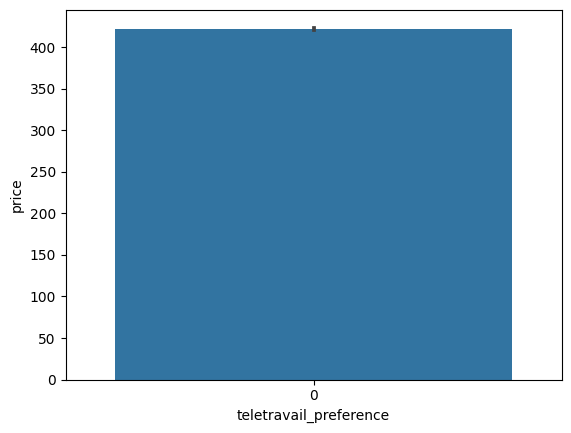

In [14]:
sns.barplot(x='teletravail_preference', y='price', data=df)

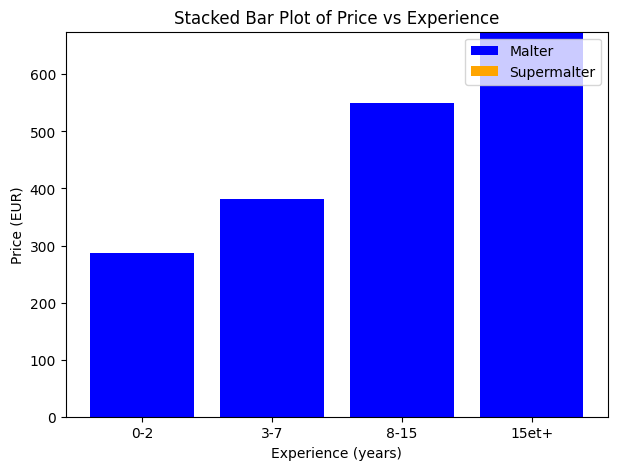

In [15]:
supermalter_data = df[df['teletravail_preference'] == 1]
non_supermalter_data = df[df['teletravail_preference'] == 0]


mean_price_supermalter = supermalter_data.groupby('experience')['price'].mean().reindex(["0-2", "3-7", "8-15", "15et+"])
mean_price_non_supermalter = non_supermalter_data.groupby('experience')['price'].mean().reindex(["0-2", "3-7", "8-15", "15et+"])


# bar_width = 0.35


fig, ax = plt.subplots(figsize=(7, 5))


ax.bar(mean_price_non_supermalter.index, mean_price_non_supermalter.values, label='Malter', color='blue')


ax.bar(mean_price_supermalter.index, (mean_price_supermalter.values - mean_price_non_supermalter.values),
       bottom=mean_price_non_supermalter.values, label='Supermalter', color='orange')


ax.set_xlabel('Experience (years)')
ax.set_ylabel('Price (EUR)')
ax.set_title('Stacked Bar Plot of Price vs Experience')
ax.legend()

plt.show()
plt.show()

compare how much missions are remote vs on site (how big is the market for remote work ?)

compare experience level of remote workers vs non remote workers